In [2]:
#For the final project of the course, we are going to cover an interesting problem: "
#Toyota Corolla Price Prediction". We want to build a machine learning model that takes some specifications of a Toyota Corolla car as input and predicts its price as the output. So, prepare your Jupyter Notebook and follow these steps to complete the task:
#1. Download the following .csv file and save it in your Notebook's directory. Then, load it into the workspace as data, and display its first 6 rows.
#   Toyota_Corolla.csv
#This data contains 21 features and 1436 rows. You can find features descriptions in the following PDF file:
#    Features Description.pdf
#As we explained above, the target field is the 'Price' column.
#2. Count and print the following statistics:
#Number of data samples
#Number of features
#Number of missing values for each feature
#Frequency of different number of doors (2, 3, 4, and 5)
#Frequency of different fuel types (Petrol, Diesel, CNG)
#3. Compute and print the following values:
#The mean of price in each fuel type class? which class is more expensive?
#The mean of price in class ABS=0 and in class ABS=1.
#The mean of price in class Met_Color=0 and in class Met_Color=1.
#The mean of price in two-door, three-door,.... cars. 
#Hint: use .groupby() .
#4. Display the following plots:
#Scatter plot between 'KM' and 'Price'.
#Scatter plot between 'cc' and 'Price'.
#Distribution plot of continuous variables.
#Boxplot of continuous variables.
#Hint: continuous_variables = ["Age", "KM", "HP", "cc","Doors","Guarantee_Period"].
#5. Using the Boxplot you created in the previous question, you detected features with outliers. Remove the outlier values from the dataframe.
#6. Since The 'Fuel_Type' variable is categorical, you need to convert it to numeric values. (Hint: Create three dummy variables and then drop the 'Fuel_Type' column.
#7. Once again display the first 10 rows of data after you applied this conversion to make sure they have been applied correctly.
#8. Store the "Price" column of data in the variable y, and other columns in variable X.
#9. Use the train_test_split function to split X and y into a training set (X_train, y_train) with 75% of data, and a test set (X_test, y_test) with the remaining 25%.
#10. Print the shape of X_train, X_test, y_train, y_test.
#11. Train the Linear regression algorithm on X_train and y_train. Note that you should put normalize= True.
#12. Use the attribute .score to check the accuracy of the model on train and test data.
#13. Put y_hat_test = model.predict(X_test) and then plot the scatter plot between y_hat_test and y_test.
#14. Print the r2_score and mean_squared_error of the model.
#15. Fit RandomForestRegressor algorithm on the trained data and then repeat steps 12-14 for this algorithm too. (Note that since this algorithm does not have a normalized or max_min scaler parameter, you should scale data before feeding it to the algorithm).
#16. Apply another suitable algorithm on the train and test data and evaluate it. 

In [3]:
#step1
import pandas as pd
data = pd.read_csv('C:\\Users\\malfa\\Desktop\\python program course\\Toyota_Corolla.csv')
data

,Price,Age,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,...,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model
0,13500,23,46986,Diesel,90,1,0,2000,3,0,...,1,0,0,1,0,1,1,1,0,0
1,13750,23,72937,Diesel,90,1,0,2000,3,0,...,1,1,0,1,1,1,0,1,0,0
2,13950,24,41711,Diesel,90,1,0,2000,3,1,...,1,0,0,1,0,0,0,1,0,0
3,14950,26,48000,Diesel,90,0,0,2000,3,1,...,1,0,0,1,0,0,0,1,0,0
4,13750,30,38500,Diesel,90,0,0,2000,3,1,...,1,1,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1,...,1,1,0,0,0,1,1,1,1,1
1432,10845,72,19000,Petrol,86,0,0,1300,3,0,...,1,0,0,0,0,0,0,1,0,1
1433,8500,71,17016,Petrol,86,0,0,1300,3,0,...,0,0,0,0,0,0,0,1,0,0
1434,7250,70,16916,Petrol,86,1,0,1300,3,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.head(6)

,Price,Age,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,...,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model
0,13500,23,46986,Diesel,90,1,0,2000,3,0,...,1,0,0,1,0,1,1,1,0,0
1,13750,23,72937,Diesel,90,1,0,2000,3,0,...,1,1,0,1,1,1,0,1,0,0
2,13950,24,41711,Diesel,90,1,0,2000,3,1,...,1,0,0,1,0,0,0,1,0,0
3,14950,26,48000,Diesel,90,0,0,2000,3,1,...,1,0,0,1,0,0,0,1,0,0
4,13750,30,38500,Diesel,90,0,0,2000,3,1,...,1,1,0,1,0,1,1,1,1,0
5,12950,32,61000,Diesel,90,0,0,2000,3,0,...,1,1,0,1,0,1,1,1,1,0


In [5]:
#step2...part1
print(len(data))

1436


In [6]:
#step2...part2
print(data.shape)

(1436, 21)


In [7]:
#step2...part3
data.isnull().sum()

Price               0
Age                 0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Mfr_Guarantee       0
Guarantee_Period    0
ABS                 0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Mistlamps           0
Sport_Model         0
dtype: int64

In [8]:
#step2...part4
import collections
c = collections.Counter({'Doors':2, 'Doors':3, 'Doors':4, 'Doors':5})

print (c)

Counter({'Doors': 5})


In [9]:
#step2...part5
import collections
c = collections.Counter({'Petrol', 'Diesel', 'CNG'})

print (c)

Counter({'Petrol': 1, 'Diesel': 1, 'CNG': 1})


In [10]:
#step3...part1
data_g = data.groupby('Fuel_Type')
data_g['Price'].mean()

Fuel_Type
CNG        9421.176471
Diesel    11294.554839
Petrol    10679.310127
Name: Price, dtype: float64

In [11]:
#which class is more expensive? Diesel because Price: 11294.554839

In [12]:
#step3...part2
data_g = data.groupby('ABS')
data_g['Price'].mean()

ABS
0     8413.626866
1    11262.510274
Name: Price, dtype: float64

In [13]:
#step3...part3
data_g = data.groupby('Met_Color')
data_g['Price'].mean()

Met_Color
0    10162.047109
1    11004.941176
Name: Price, dtype: float64

In [14]:
#step3...part4
data_g = data.groupby('Doors')
data_g['Price'].mean()

Doors
2     8100.000000
3    10107.342444
4     9806.768116
5    11503.209199
Name: Price, dtype: float64

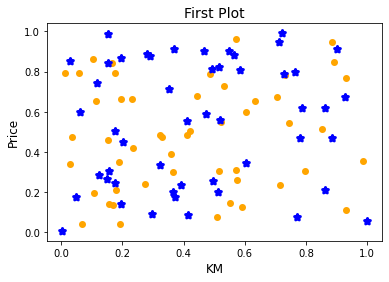

In [15]:
#step4...part1
import numpy as np
import matplotlib.pyplot as plt

data1 = np.random.random((50,2))
data2 = np.random.random((50,2))

fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(data1[:,0], data1[:,1], color='orange', marker='.', linewidth=4)
ax.scatter(data2[:,0], data2[:,1], color='blue', marker='*', linewidth=3)

ax.set_xlabel('KM', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('First Plot', fontsize=14)

plt.show()

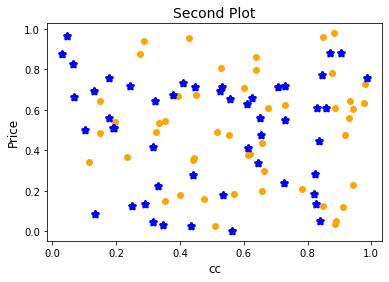

In [16]:
#step4...part2
data1 = np.random.random((50,2))
data2 = np.random.random((50,2))

fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(data1[:,0], data1[:,1], color='orange', marker='.', linewidth=4)
ax.scatter(data2[:,0], data2[:,1], color='blue', marker='*', linewidth=3)

ax.set_xlabel('cc', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Second Plot', fontsize=14)

plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'KM'}>],
       [<AxesSubplot:title={'center':'HP'}>,
        <AxesSubplot:title={'center':'cc'}>],
       [<AxesSubplot:title={'center':'Doors'}>,
        <AxesSubplot:title={'center':'Guarantee_Period'}>]], dtype=object)

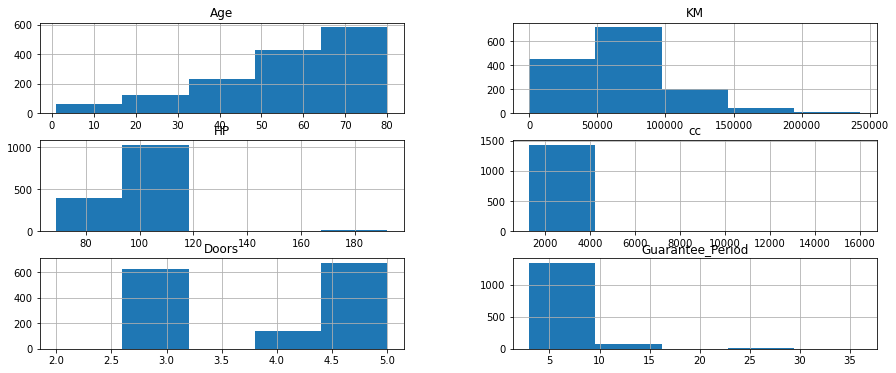

In [17]:
#step4...part3
%matplotlib inline
data.hist(column=['Age', 'KM', 'HP', 'cc', 'Doors', 'Guarantee_Period'],bins=5, figsize=(15,6))

<AxesSubplot:>

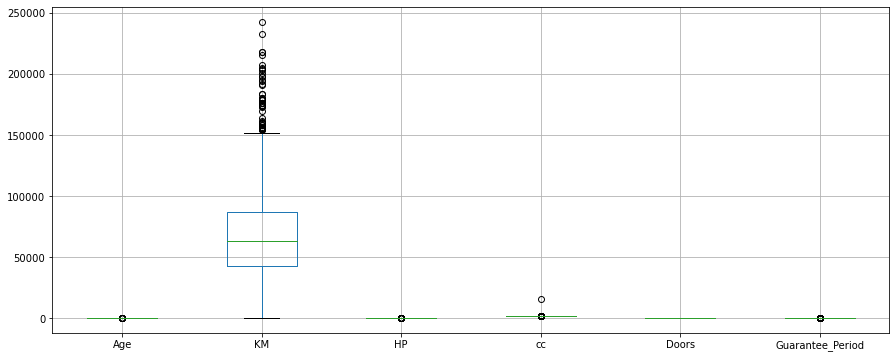

In [18]:
#step4...part4
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column=['Age', 'KM', 'HP', 'cc', 'Doors', 'Guarantee_Period'], figsize=(15,6))

<AxesSubplot:>

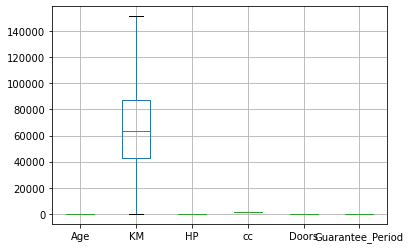

In [19]:
#step5
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(['Age', 'KM', 'HP', 'cc', 'Doors', 'Guarantee_Period'], showfliers=False)

In [20]:
#step6
dummy = pd.get_dummies(data['Fuel_Type'])
# Concatenate the dummies to original dataframe
data = pd.concat([data, dummy], axis='columns')
# drop the categorial column
data = data.drop(['Fuel_Type'], axis='columns')

In [21]:
#step7
#import pandas as pd
#data = pd.read_csv('C:\\Users\\malfa\\Desktop\\python program course\\Toyota_Corolla.csv')
data.head(10)

,Price,Age,KM,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,Guarantee_Period,...,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model,CNG,Diesel,Petrol
0,13500,23,46986,90,1,0,2000,3,0,3,...,1,0,1,1,1,0,0,0,1,0
1,13750,23,72937,90,1,0,2000,3,0,3,...,1,1,1,0,1,0,0,0,1,0
2,13950,24,41711,90,1,0,2000,3,1,3,...,1,0,0,0,1,0,0,0,1,0
3,14950,26,48000,90,0,0,2000,3,1,3,...,1,0,0,0,1,0,0,0,1,0
4,13750,30,38500,90,0,0,2000,3,1,3,...,1,0,1,1,1,1,0,0,1,0
5,12950,32,61000,90,0,0,2000,3,0,3,...,1,0,1,1,1,1,0,0,1,0
6,16900,27,94612,90,1,0,2000,3,0,3,...,1,0,1,1,1,0,1,0,1,0
7,18600,30,75889,90,1,0,2000,3,1,3,...,1,1,1,1,1,0,0,0,1,0
8,21500,27,19700,192,0,0,1800,3,0,3,...,0,0,1,1,1,0,0,0,0,1
9,12950,23,71138,69,0,0,1900,3,0,3,...,1,0,0,0,1,0,0,0,1,0


In [22]:
#step8
y = data["Price"]
X = data.drop('Price', axis = 1)
print(y)
print(X)

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64
      Age     KM   HP  Met_Color  Automatic    cc  Doors  Mfr_Guarantee  \
0      23  46986   90          1          0  2000      3              0   
1      23  72937   90          1          0  2000      3              0   
2      24  41711   90          1          0  2000      3              1   
3      26  48000   90          0          0  2000      3              1   
4      30  38500   90          0          0  2000      3              1   
...   ...    ...  ...        ...        ...   ...    ...            ...   
1431   69  20544   86          1          0  1300      3              1   
1432   72  19000   86          0          0  1300      3              0   
1433   71  17016   86          0          0  1300      3              0   
1434   70  16916   86          1          0  1300      3

In [23]:
#step8 & step9 & step10
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 22)
Shape of X_test:  (359, 22)
Shape of y_train:  (1077,)
Shape of y_test (359,)


In [24]:
#step11
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

print(lr_model.coef_)
print(lr_model.intercept_)

[-1.26673163e+02 -1.94414849e-02  4.00102961e+01 -1.40073223e+02
  7.87740138e+02 -1.32747560e-01  1.99741504e+02  3.15846541e+02
  4.09122119e+01 -4.05634702e+02  1.56283997e+02  3.05406108e+03
 -4.18517465e+02  2.96449120e+02 -1.51197109e+02  5.78390228e+02
  9.42748343e+01  1.43445395e+02  4.62338251e+02 -8.28095426e+02
  1.44973806e+03 -6.21642636e+02]
14291.784539784203


In [25]:
#step12
print("Score of train data")
print(lr_model.score(X_train, y_train))
print("Score of test data")
print(lr_model.score(X_test, y_test))

Score of train data
0.8873005449556254
Score of test data
0.8641623681317583


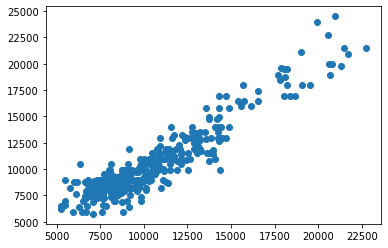

In [26]:
#step13
y_hat_test = lr_model.predict(X_test)
plt.scatter(y_hat_test, y_test)
plt.show()

In [27]:
#step14...1
from sklearn.metrics import r2_score
r2 = r2_score(y_hat_test, y_test)
print(r2)

0.8635579607271198


In [28]:
#step14...2
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_hat_test, y_test)
print(mse)

1523817.8939740951


In [29]:
#step 15
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 1200, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=1200, random_state=0)

In [30]:
print("Score of train data")
print(regressor_rf.score(X_train, y_train))
print("Score of test data")
print(regressor_rf.score(X_test, y_test))

Score of train data
0.9872933233037451
Score of test data
0.902289079972635


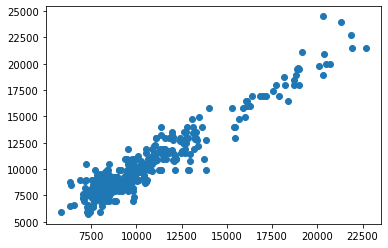

In [31]:
y_hat_test = regressor_rf.predict(X_test)
plt.scatter(y_hat_test, y_test)
plt.show()

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_hat_test, y_test)
print(r2)

0.8978323157015586


In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_hat_test, y_test)
print(mse)

1096114.8713104248


In [34]:
#step 16
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knn_reg.fit(X, y)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [35]:
print("Score of train data")
print(knn_reg.score(X_train, y_train))
print("Score of test data")
print(knn_reg.score(X_test, y_test))

Score of train data
0.7213317887363875
Score of test data
0.7303873699046921


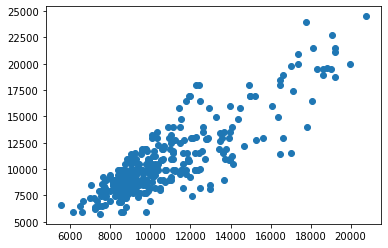

In [36]:
y_hat_test = knn_reg.predict(X_test)
plt.scatter(y_hat_test, y_test)
plt.show()

In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_hat_test, y_test)
print(r2)

0.6151558414724946


In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_hat_test, y_test)
print(mse)

3024497.295264624
